# Importing Modules

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Fraud.csv")

In [11]:
df.head(n=10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [12]:
#removing null values from df 
df = df.dropna()
df.shape

(6362620, 11)

In [13]:
#converting data types of coloumn 
df["amount"] = df["amount"].astype(float)
df["oldbalanceOrg"] = df["oldbalanceOrg"].astype(float)
df["newbalanceOrig"] = df["newbalanceOrig"].astype(float)

In [14]:
#removing outliners using Tukey's method
Q1 = df["amount"].quantile(0.25)
Q3 = df["amount"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["amount"] > (Q1 - 1.5 * IQR)) & (df["amount"] < (Q3 + 1.5 * IQR))]


In [15]:
df.shape

(6024542, 11)

In [16]:
#saving cleaned data
df.to_csv("cleaned_fraud_data.csv", index=False)

# EDA

In [17]:
#importing cleaned dataset
df = pd.read_csv("cleaned_fraud_data.csv")

In [18]:
df.shape

(6024542, 11)

In [19]:
df.head(n=20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [20]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06,6.024542e+06
mean,2.433126e+02,1.115342e+05,8.619579e+05,8.859130e+05,9.871265e+05,1.037883e+06,7.235405e-04,3.319754e-07
std,1.422881e+02,1.203983e+05,2.933837e+06,2.969976e+06,3.031559e+06,3.055336e+06,2.688898e-02,5.761731e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.236854e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,6.317582e+04,1.514600e+04,0.000000e+00,1.027301e+05,1.683203e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,1.829338e+05,1.134380e+05,1.602874e+05,8.249873e+05,9.251457e+05,0.000000e+00,0.000000e+00
max,7.430000e+02,5.017184e+05,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024542 entries, 0 to 6024541
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 505.6+ MB


# data visualization

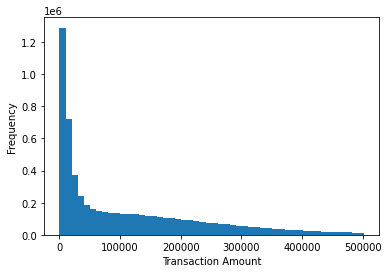

In [23]:
plt.hist(df['amount'], bins=50)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

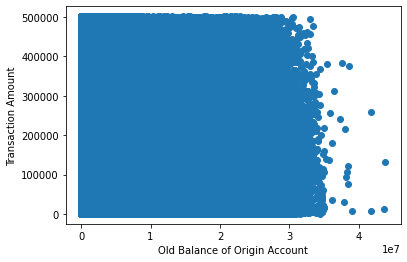

In [24]:
# Ploting scatterplot of transaction amounts vs. old balance of origin account
plt.scatter(df['oldbalanceOrg'], df['amount'])
plt.xlabel('Old Balance of Origin Account')
plt.ylabel('Transaction Amount')
plt.show()

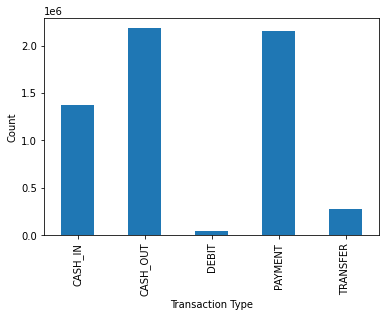

In [25]:
# Ploting bar chart
df.groupby('type').size().plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Model Selection

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
# Data cleaning and preprocessing
df.dropna(inplace=True)
df = pd.get_dummies(df, columns=['type'])
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

In [28]:
# Feature engineering
X['diffOrigBal'] = X['newbalanceOrig'] - X['oldbalanceOrg']
X['diffDestBal'] = X['newbalanceDest'] - X['oldbalanceDest']

In [29]:
# Selecting only numeric columns for fitting of model
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
numeric_df = X[numeric_cols]

In [30]:
numeric_df.head(n=10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diffOrigBal,diffDestBal
0,1,9839.64,170136.00,160296.36,0.0,0.00,-9839.64,0.00
1,1,1864.28,21249.00,19384.72,0.0,0.00,-1864.28,0.00
2,1,181.00,181.00,0.00,0.0,0.00,-181.00,0.00
3,1,181.00,181.00,0.00,21182.0,0.00,-181.00,-21182.00
4,1,11668.14,41554.00,29885.86,0.0,0.00,-11668.14,0.00
5,1,7817.71,53860.00,46042.29,0.0,0.00,-7817.71,0.00
6,1,7107.77,183195.00,176087.23,0.0,0.00,-7107.77,0.00
7,1,7861.64,176087.23,168225.59,0.0,0.00,-7861.64,0.00
8,1,4024.36,2671.00,0.00,0.0,0.00,-2671.00,0.00
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,-5337.77,-1549.21


In [31]:
X.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,diffOrigBal,diffDestBal
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0,-9839.64,0.0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0,-1864.28,0.0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1,-181.00,0.0
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0,-181.00,-21182.0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0,-11668.14,0.0


In [32]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(numeric_df, y, test_size=0.3, random_state=42)

In [35]:
# Defining a list of models to evaluate
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [34]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1 score:', f1_score(y_test, y_pred))
    print('-' * 50)

LogisticRegression
Accuracy: 0.9992862529552724
Precision: 0.5067985166872683
Recall: 0.3151421983089931
F1 score: 0.38862559241706157
--------------------------------------------------
DecisionTreeClassifier
Accuracy: 0.9996055026024102
Precision: 0.7325949367088608
Recall: 0.7117601844734819
F1 score: 0.7220272904483431
--------------------------------------------------
RandomForestClassifier
Accuracy: 0.9996165684480649
Precision: 0.9075067024128687
Recall: 0.5203689469638739
F1 score: 0.6614557889594529
--------------------------------------------------


# Implementing K-fold cross validation

In [36]:
# Define the number of folds for cross-validation
n_splits = 5

In [38]:
# Initialize the KFold cross-validator
from sklearn.model_selection import KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [39]:
# Initialize lists to store evaluation metrics
precision_scores = []
recall_scores = []
f1_scores = []

In [42]:
for train_index, test_index in kf.split(numeric_df):

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Calculating precision, recall, and F1 score for present fold
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [43]:
avg_precision = sum(precision_scores) / n_splits
avg_recall = sum(recall_scores) / n_splits
avg_f1 = sum(f1_scores) / n_splits

print('Average Precision:', avg_precision)
print('Average Recall:', avg_recall)
print('Average F1 Score:', avg_f1)

Average Precision: 0.7238130580933365
Average Recall: 0.7146810146041507
Average F1 Score: 0.7192121142391986


# Assignment Questions